In [2]:
import random as rng
from itertools import product
from collections import Counter
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
class Card:
    def __init__(self,fig,col):
        self.slownik =[
            {
            '2' : '2',
            '3' : '3',
            '4' : '4',
            '5' : '5',
            '6' : '6',
            '7' : '7',
            '8' : '8',
            '9' : '9',
            '10' : '10',
            'J' : 'Jack',
            'Q' : 'Queen',
            'K' : 'King',
            'A' : 'Ace'},
            {
            'H': 'Hearts',
            'D': 'Diamonds',
            'C': 'Clubs',
            'S': 'Spades'}
            ]
        
        
        while fig.upper() not in self.slownik[0].keys():
            print('błędne oznaczenie figury karty')
            fig = input('Podaj poprawne oznaczenie figury karty: ')
        self.figure = fig.upper()
        
        while col.upper() not in self.slownik[1].keys():
            print('błędne oznaczenie koloru karty')
            col = input('Podaj poprawne oznaczenie koloru karty: ')
        self.colour = col.upper()
        

        rank_dict = {figure : rank for rank,figure in enumerate(self.slownik[0].keys())}
        self.rank_of_card = rank_dict[self.figure]

    def __enter__(self):
        return self

    def __str__(self):
        return f'{self.slownik[0][self.figure]} of {self.slownik[1][self.colour]}'
    
    def __repr__(self):
        return f'{self.figure}{self.colour}'

    def __lt__(self,other):
        return self.rank_of_card < other.rank_of_card
    def __le__(self,other):
        return self.rank_of_card <= other.rank_of_card
    def __gt__(self,other):
        return self.rank_of_card > other.rank_of_card
    def __ge__(self,other):
        return self.rank_of_card >= other.rank_of_card
    def __eq__(self,other):
        return self.rank_of_card == other.rank_of_card

definicja obiektu <u>KARTA</u>, z atrybutamni

In [4]:
class Deck:
    def __init__(self):
        figures = '2 3 4 5 6 7 8 9 10 J Q K A'.split()
        colours = 'H D C S'.split()
        self.talia = []
        for i in product (figures, colours):
            self.talia.append(Card(i[0], i[1]))
    def __len__(self):
        return len(self.talia)
    
    def __enter__(self):
        return self

    def __str__(self):
        return f'karty w talii [{len(self)}]: \n{self.talia}\n * * * * *'
    def shuffle(self):
        temp_deck = self.talia[:]
        self.talia = []
        while temp_deck:
            self.talia.append(temp_deck.pop(rng.randint(0,len(temp_deck)-1)))
        #print(temp_deck)
    def draw(self, n = 1):
        card_list = []
        while n:
            card_list.append(self.talia.pop())
            n-=1
        return card_list
    def reset(self):
        self.__init__()
        self.shuffle()


In [5]:
class Hand:
    def __init__(self):
        self.cards_in_hand =  []
        self.cards_on_table = []
        self.high_card = None
        self.in_hand = {
            'high_card' : None,
            'pairs' : [],  # pairs
            'two_pairs' : [],
            'threes' : [], # threes
            'straight' : [], # straights
            'flush' : [], # flushes
            'full_house' : [], #full house
            'fours' : [], # fours of a kind
            'straight_flush' : [] # straight flushes
            }
    def get_card(self, talia: Deck, n :int):
        for card in talia.draw(n):
            self.cards_in_hand.append(card)
        self.find_high_card()
    
    def get_specific_cards(self, talia: Deck, list_of_cards: list):
        for card in list_of_cards:
            self.cards_in_hand.append(Card(card.upper()[:-1],card.upper()[-1]))
            for id, card_in_deck in enumerate(talia.talia):
                if card_in_deck.figure == card.upper()[:-1] and card_in_deck.colour == card.upper()[-1]:
                    del talia.talia[id]
        self.find_high_card()

    def find_high_card(self):
        self.high_card = (self.cards_in_hand[0])
        for card in self.cards_in_hand:
            if card.rank_of_card > self.high_card.rank_of_card:
                self.high_card = card

    def __str__(self):
        return f'cards in hand:\n{sorted(self.cards_in_hand)}\nHigh Card: {self.high_card}'

    def reset_hand(self):
        self.__init__()
        
    def check_hand(self):
        #print('**********')
        
        ranks = sorted(set([card.rank_of_card for card in self.cards_in_hand+self.cards_on_table]))
        rank_diffs = [ranks[i+1] - ranks[i] for i in range(len(ranks)-1)]
        for i in range(len(rank_diffs)-4):
            if rank_diffs[i:4+i] == [1,1,1,1]:
                self.in_hand ['straight'] = ranks[4+i]
        
        if len(ranks) >= 5:
                if [ranks[i+1] - ranks[i] for i in range(0,4)] == [1,1,1,1]:
                    self.in_hand['straight'] = ranks[-1]

        self.high_card = (sorted(self.cards_in_hand)[-1], ranks[-1])
        self.in_hand['high_card'] = ranks[-1]

        figures_in_hand = [card.rank_of_card for card in self.cards_in_hand+self.cards_on_table]  
        
        #print(self.cards_in_hand)
        #print(f'{sorted(figures_in_hand)=}')
        ile_czego   = list(Counter(sorted(figures_in_hand)).items())
        ile_kolorow = sorted(Counter([card.colour for card in self.cards_in_hand+self.cards_on_table]).items(), key = lambda x: x[1], reverse = True)
        #print(f'{ile_kolorow=}')
        if ile_kolorow[0][1] == 5 :
            self.in_hand['flush'] = self.cards_in_hand[0].colour

        if self.in_hand['flush'] and self.in_hand['straight']:
            self.in_hand['straight_flush'] = self.in_hand['straight']

        #print(f'{ile_czego = }')
        while len(ile_czego):
            a = ile_czego.pop()
            if a[1] == 2:
                self.in_hand['pairs'].append(a[0])
            elif a[1] == 3:
                self.in_hand['threes'].append(a[0])
            elif a[1] == 4:
                self.in_hand['fours'].append(a[0])

        if len(self.in_hand['pairs']) >= 2:
            self.in_hand['two_pairs'] = sorted(self.in_hand['pairs'],reverse=True)[:2]
        if all([self.in_hand['threes'],self.in_hand['pairs']]):
            self.in_hand['full_house'] = (self.in_hand['threes']+ self.in_hand['pairs'])
        if len(self.in_hand['threes'])>=2:
            self.in_hand['full_house'] = self.in_hand['threes']



    def __lt__(self, other):
        if max([(i, suit) for i, suit in enumerate(self.in_hand.values()) if suit]) ==  max([(i, suit) for i, suit in enumerate(other.in_hand.values()) if suit]):
            return self.in_hand["high_card"] < other.in_hand["high_card"]
        else:
            return max([(i, suit) for i, suit in enumerate(self.in_hand.values()) if suit]) < max([(i, suit) for i, suit in enumerate(other.in_hand.values()) if suit])


    def __eq__(self, other):
        if self.in_hand['high_card'] == other.in_hand['high_card']:
            return max([i for i, suit in enumerate(self.in_hand.items()) if suit]) == max([i for i, suit in enumerate(self.in_hand.items()) if suit])
        else:
            return False


    def __gt__(self, other):
        if max([(i, suit) for i, suit in enumerate(self.in_hand.values()) if suit]) ==  max([(i, suit) for i, suit in enumerate(other.in_hand.values()) if suit]):
            return self.in_hand["high_card"] > other.in_hand["high_card"]
        else:
            return max([(i, suit) for i, suit in enumerate(self.in_hand.values()) if suit]) > max([(i, suit) for i, suit in enumerate(other.in_hand.values()) if suit])

        #print(self.in_hand)
        #print([q for q in self.in_hand.items() if q[1] != []])

In [6]:
tal = Deck()
reka_strit = Hand()
reka_strit.cards_in_hand =  [Card('2','S'), Card('3','S')]
reka_strit.cards_on_table = [Card('4','S'), Card('5','S'), Card('5','H'), Card('7','D'), Card('A','S')]
reka_strit.check_hand()
print(sorted(reka_strit.cards_in_hand+reka_strit.cards_on_table))
print(reka_strit.in_hand)
print('88888888888888888888888888888888888888')
reka_pair = Hand()
reka_pair.cards_in_hand =  [Card('K','S'), Card('Q','S')]
reka_pair.cards_on_table = [Card('3','D'), Card('4','S'), Card('5','H'), Card('5','D'), Card('5','S')]
reka_pair.check_hand()
print(sorted(reka_pair.cards_in_hand+reka_pair.cards_on_table))
print(reka_pair.in_hand)
print('88888888888888888888888888888888888888')
 
print(reka_pair == max ([reka_pair,reka_strit]))

[2S, 3S, 4S, 5S, 5H, 7D, AS]
{'high_card': 12, 'pairs': [3], 'two_pairs': [], 'threes': [], 'straight': [], 'flush': 'S', 'full_house': [], 'fours': [], 'straight_flush': []}
88888888888888888888888888888888888888
[3D, 4S, 5H, 5D, 5S, QS, KS]
{'high_card': 11, 'pairs': [], 'two_pairs': [], 'threes': [3], 'straight': [], 'flush': [], 'full_house': [], 'fours': [], 'straight_flush': []}
88888888888888888888888888888888888888
False


In [34]:
def texas_holdem_monte_carlo(karty_w_rece: list, karty_na_stole: list(), ilosc_graczy = 2, wielkosc_proby = 2_000):
    talia = Deck()
    wygrane = 0
    for game in range(wielkosc_proby):
        gracze = []
        moja_reka = Hand()
        moja_reka.get_specific_cards(talia, karty_w_rece)
        stol = Hand()
        stol.get_specific_cards(talia, karty_na_stole)
        moja_reka.cards_on_table = stol.cards_in_hand
        moja_reka.check_hand()
        gracze.append(moja_reka)
        talia.shuffle()

        for _ in range(0,ilosc_graczy-1):
            gracze.append(Hand())
            gracze[-1].get_card(talia,2)
            gracze[-1].cards_on_table = stol.cards_in_hand
            gracze[-1].check_hand()
            #print(gracze[-1].in_hand)
            #print(gracze[-1].cards_on_table + gracze[-1].cards_in_hand)
            #print('***')


        talia.reset()
        wygrane += moja_reka == (sorted(gracze)[-1]) and (moja_reka!=sorted(gracze)[-2])
        
    
    #print([f'{gr.cards_on_table}' for gr in gracze])
    #print(f'max = {max(gracze)}')
    #print(f'{wygrane/wielkosc_proby:.2%}')

    return wygrane/wielkosc_proby

C:\Users\geos48.GEOSERWIS\AppData\Roaming\Python\Python310\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))


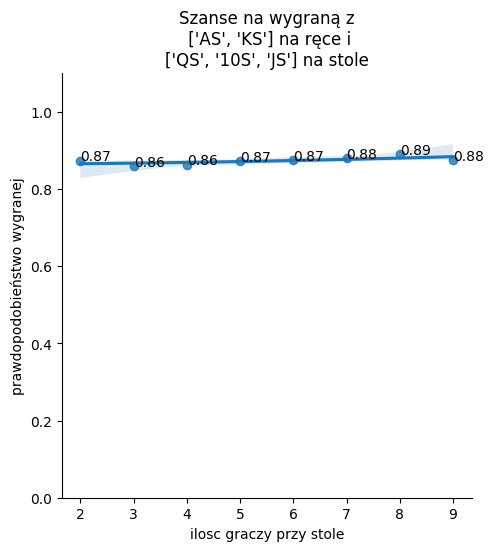

In [36]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = 4,4

a = {
    2:0,
    3:0,
    4:0,
    5:0,
    6:0,
    7:0,
    8:0,
    9:0
    }
raczka = ['AS', 'KS']
stolik = ['QS', '10S', 'JS']
for i in a.keys():
    a[i] = texas_holdem_monte_carlo(raczka, stolik,i)

aa = pd.DataFrame().assign(X = a.keys(), Y = a.values())

#print(aa)


sns.lmplot(data = aa, x= 'X', y = 'Y', order = 2)
plt.xlabel('ilosc graczy przy stole')
plt.ylabel('prawdopodobieństwo wygranej')
plt.title(f'Szanse na wygraną z\n {raczka} na ręce i\n{stolik} na stole')
plt.ylim((0,1.1))
for i in a.items():
    plt.text(i[0], i[1], '%.2f' % i[1])
plt.show()
   

C:\Users\geos48.GEOSERWIS\AppData\Roaming\Python\Python310\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))


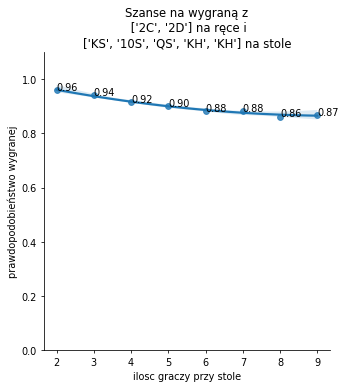

In [27]:
a = {
    2:0,
    3:0,
    4:0,
    5:0,
    6:0,
    7:0,
    8:0,
    9:0
    }
raczka = ['2C', '2D']
stolik = ['KS', '10S', 'QS', 'KH', 'KH']
for i in a.keys():
    a[i] = texas_holdem_monte_carlo(raczka, stolik,i)

#print(a)
#b = [str(s) for s in a.values()]
aa = pd.DataFrame().assign(X = a.keys(), Y = a.values())

#print(aa)


sns.lmplot(data = aa, x= 'X', y = 'Y', order = 2)
plt.xlabel('ilosc graczy przy stole')
plt.ylabel('prawdopodobieństwo wygranej')
plt.title(f'Szanse na wygraną z\n {raczka} na ręce i\n{stolik} na stole')
plt.ylim((0,1.1))
for i in a.items():
    plt.text(i[0], i[1], '%.2f' % i[1])
plt.show()

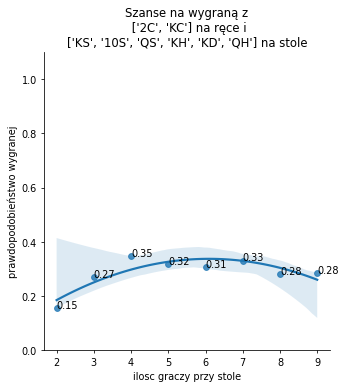

In [22]:
a = {
    2:0,
    3:0,
    4:0,
    5:0,
    6:0,
    7:0,
    8:0,
    9:0
    }
raczka = ['2C', 'KC']
stolik = ['KS', '10S', 'QS', 'KH', 'KD', 'QH']
for i in a.keys():
    a[i] = texas_holdem_monte_carlo(raczka, stolik,i)

#print(a)
#b = [str(s) for s in a.values()]
aa = pd.DataFrame().assign(X = a.keys(), Y = a.values())

#print(aa)


sns.lmplot(data = aa, x= 'X', y = 'Y', order = 2)
plt.xlabel('ilosc graczy przy stole')
plt.ylabel('prawdopodobieństwo wygranej')
plt.title(f'Szanse na wygraną z\n {raczka} na ręce i\n{stolik} na stole')
plt.ylim((0,1.1))
for i in a.items():
    plt.text(i[0], i[1], '%.2f' % i[1])
plt.show()

class Game:
    def __init__(self, players, blind = 0):
        self.start_time = None  # to work on
        self.end_time   = None  #  as above
        self.list_of_players= [] 
        self.deck = Deck()
        self.deck.shuffle()

        for player in players:
            self.list_of_players.append(player)
        
        self.loot = blind
        self.blind_value = 0
        self.small_blind_value = self.blind_value//2
        self.loot = self.blind_value + self.small_blind_value
    def turn_flop(self):
        flop = self.deck.draw(3)
        for player in self.list_of_players:
            for card in flop:
                player.hand.cards_on_table.append(card)
        for player in self.list_of_players:
            player.hand.find_high_card()
        print('*********FLOP********')

    def turn_turn(self):
        turn = self.deck.draw(1)
        for player in self.list_of_players:
            player.hand.cards_on_table.append(turn[0])
        for player in self.list_of_players:
            player.hand.find_high_card()
        print('*********TURN********')
    def turn_river(self):
        turn = self.deck.draw(1)
        for player in self.list_of_players:
            player.hand.cards_on_table.append(turn[0])
        for player in self.list_of_players:
            player.hand.find_high_card()
        print('*********RIVER********')

    def end_game(self):
        return True
g1 = Game([p1,p2], blind = 100)
g1.turn_flop()
print(p1)
print(p2)
g1.turn_turn()
print(p1)
print(p2)
g1.turn_river()
print(p1)
print(p2)
g1 = Game([p1,p2], blind = 100)